# **AP155 Lab Assignment** 
## Module 1: Integrals and Derivatives

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible. 

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points** (Problems 1 to 5 are worth 20, 20, 10, 30, and 20 points, respectively).

_Due Date_: **5PM of November 3 (Thu)**



### Student Information 

_Full Name (Last Name, First Name)_:  Hernandez, Hans Emmanuel \
_Student No._: 2020-11387 \
_Section_: THU-HX-4

### Submission Information

_Date and Time Submitted (most recent upload)_: November 16

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name: HANS EMMANUEL HERNANDEZ** 

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **XX**/100

Score breakdown:
* Problem 1 - XX/20
* Problem 2 - XX/20
* Problem 3 - XX/10
* Problem 4 - XX/30
* Problem 5 - XX/20

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_ 

PROBLEM 1 (20 pts.) 
**Integration using the trapezoidal rule and Simpson's rule**

Calculate the integral of the function $ 2x^4 + 3x^2 + 4x + 5$ from $x=0$ to $x=5$.

1. Do the numerical calculation using the trapezoidal rule with 10, 100, and 1,000 slices. Describe each step of the calculation clearly and concisely. *(8 pts.; 4 pts. for the code & 4 pts. for the discussion text)*

2. What are the percentage errors of your answers in (1)? *(2 pts.)*

3. Repeat the calculation using Simpson's rule with 10, 100, and 1,000 slices. Describe each step of the calculation clearly and concisely. *(8 pts.;  4 pts. for the code & 4 pts. for the discussion text)*

4. What are the percentage errors of your answers in (3)? How do they compare with the results from (1) for the same number of slices? *(2 pts.)*

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from numpy import ones,copy,sin,cos,cosh,tan,tanh,pi,linspace,sqrt

**TRAPEZOIDAL RULE**

In [174]:
# Define the given function as f(x)
def f(x):
  return (2*x**4 + 3*x**2 + 4*x + 5)

# Define the trapezoidal rule
def trapezoid(f, N, a, b):
  h = (b-a)/N                                          # width formula
  m = 0.5*f(a) + 0.5*f(b)                              # initialize m
# Summation in loop over slices k from 1 to N-1
  for k in range(1,N):                                 
      m += f(a+k*h)
  m = m*h                                              # trapezoidal rule formula
  return(m)                                            # returns experimental value of integral

In [175]:
# Make an array containing the N slices
N_arr = np.array([10, 100, 1000])
a = 0                                                  # lower bound
b = 5.0                                                # upper bound

# Initialize arrays with zeroes 
m_arr = np.zeros(len(N_arr))                           # array for experimental value of integral
pct_arr = np.zeros(len(N_arr))                         # array for percent error of experimental integral
exact_m = 1450                                         # exact value of integral

# Loop over elements of the constructed arrays
for i in np.arange(len(N_arr)):
  m_arr[i] = trapezoid(f, N_arr[i], a, b)              # solve for elements in m_arr using user-defined trapezoid function
  pct_arr[i] = (m_arr[i] - exact_m) / exact_m          # solve for elements in pct_arr using the standard percent error formula
  print("Slices:", N_arr[i], "Experimental value:", m_arr[i], "Percent error:", pct_arr[i])            

Slices: 10 Experimental value: 1471.4375 Percent error: 0.01478448275862069
Slices: 100 Experimental value: 1450.2145812500003 Percent error: 0.00014798706896569988
Slices: 1000 Experimental value: 1450.0021458331234 Percent error: 1.4798849127240327e-06


**SIMPSON'S RULE**

In [92]:
# Define the Simpson's rule
def simpson(N, a, b):
  h = (b-a)/N                    # width formula
  s = f(a) + f(b)                # initialize s
  for k in range(1,N,2):         # loop over the odd values of k
      s += 4*f(a+k*h)
  for k in range(2,N,2):         # loop over the even values of k
      s += 2*f(a+k*h)
  s = s*(1./3)*h                 # Simpson's rule formula
  return(s)                      # returns experimental value of integral

In [93]:
# Make an array containing the N slices
N_arr = np.array([10, 100, 1000])                   
a = 0.0                                             # lower bound
b = 5.0                                             # upper bound

# Initialize arrays with zeroes 
s_arr = np.zeros(len(N_arr))                        # array for experimental value of integral
pct_arr = np.zeros(len(N_arr))                      # array for percent error of experimental integral
exact_s = 1450                                      # exact value of integral

# Loop over elements of the constructed arrays
for i in np.arange(len(N_arr)):
  s_arr[i] = simpson(N_arr[i], a, b)                # solve for elements in s_arr using user-defined simpson function
  pct_arr[i] = (s_arr[i] - exact_s)/exact_s         # solve for elements in pct_arr using the standard percent error formula
  print("Slices:", N_arr[i], "Experimental value:", s_arr[i], "Percent error:", pct_arr[i])

Slices: 10 Experimental value: 1450.0833333333333 Percent error: 5.7471264367763824e-05
Slices: 100 Experimental value: 1450.0000083333337 Percent error: 5.747126657485657e-09
Slices: 1000 Experimental value: 1450.0000000008342 Percent error: 5.753338035870472e-13


**As we can see from both results, applying Simpson's rule gave a more accurate approximation at significantly lower slices since every set of three successive points are fitted into a parabola.**

### PROBLEM 2 (20 pts.)

**Integration using the adaptive trapezoidal rule method and Romberg integration**

Calculate the integral $ I = \int_0^1 \sin^2 \sqrt{100x} \mbox{d}x $.

1. Do the numerical calculation using the adaptive trapezoidal rule method to an approximate accuracy of $\epsilon = 10^{-6}$. Start with one single integration slice and work up from there to two, four, eight, and so forth. Save and print out the number of slices, its estimate of the integral, and its estimate of the error on the integral, for each value of the number of slices $N$, until the target accuracy is reached. *(8 pts.; 4 pts. for the code & 4 pts. for the discussion text)*

2. Repeat the calculation using the Romberg integration technique. Save and print out the same variables as in (1). *(8 pts.; 4 pts. for the code & 4 pts. for the discussion text)*

3. Compare the results from both calculations by creating a plot of error estimates vs. $N$. Annotate your chart completely (include proper axis labels and legend). Describe how the trends for the two techniques compare. *(4 pts.; 2 pts. for the chart & 2 pts. for the discussion text)*

**ADAPTIVE TRAPEZOIDAL RULE**

In [169]:
# Assign values
a = 0                      # lower bound
b = 1                      # upper bound
N = 1                      # initial # of slice
h = (b-a)/N                # width formula
eps = 1e-6                 # desired approximation accuracy constant

# Define the given function as g(x)
def g(x):
  return (sin(sqrt(100*x)))**2

# Get the initial value of the trapezoid with N = 1
Initial_trap = trapezoid(g, N, a, b)                       # call trapezoid function from before and input appropriate variable
error = (1/3)*(Initial_trap)                               # get the error for the first integral approximation

# Initialize lists
N_list = []                                                # list of N slices
I_estimate_list = []                                       # list of the experimental value of the integral
error_adapt_trap_list = []                                 # list of the computed error

# Append corresponding values for the initial integral
N_list.append(N)
I_estimate_list.append(Initial_trap)
error_adapt_trap_list.append(error)

In [170]:
# Initialize dataframe
adapt_trap_df = pd.DataFrame()

# Loop until error reaches the desired accuracy
while abs(error) > eps:
  Adaptive_trap = 0.5*(Initial_trap)                      # initialize the value of the next trapezoid
  N*=2                                                    # double the number of slices
  N_list.append(N)                                        # append the value of the number of slices

  for k in range(1, N ,2):                                # loop over the odd values of k
    h = (b-a)/N                                           # update the value of h since we doubled N
    Adaptive_trap += h*g(a + k*h)                         # adaptive trapezoid formula  

  I_estimate_list.append(Adaptive_trap)                   # append the integral estimate value
  error = (1/3)*abs(Adaptive_trap - Initial_trap)         # update the error formula
  error_adapt_trap_list.append(error)                     # append the updated error value
  Initial_trap = Adaptive_trap                            # repeat by assigning the last solved integral estimate as the new initial integral estimate of the loop

# Assign the created lists to columns in the dataframe
adapt_trap_df['No. of slices'] = N_list
adapt_trap_df['Integral estimate'] = I_estimate_list
adapt_trap_df['Error'] = error_adapt_trap_list
adapt_trap_df['Target error'] = eps
display(adapt_trap_df)

print("Desired approximate accuracy is reached with", N, "slices with an error of", error)

,No. of slices,Integral estimate,Error,Target error
0,1,0.147979,4.932649e-02,0.000001
1,2,0.325232,5.908414e-02,0.000001
2,4,0.512283,6.235031e-02,0.000001
3,8,0.402997,3.642847e-02,0.000001
4,16,0.430103,9.035307e-03,0.000001
5,32,0.448415,6.103765e-03,0.000001
6,64,0.453913,1.832755e-03,0.000001
7,128,0.455349,4.785244e-04,0.000001
8,256,0.455711,1.209207e-04,0.000001
9,512,0.455802,3.031107e-05,0.000001


Desired approximate accuracy is reached with 4096 slices with an error of 4.7402554180046386e-07


In [172]:
# Initialize dataframe and lists for plotting
rom_df = pd.DataFrame()   
rom_triangle = []               # initialize list for all integral estimates using Romberg integration
rom_estimate = []               # initialize list for final integral estimate per row

# Solve for the error of the first integral estimate I1
rom_error = (1/(4**1 - 1))*(adapt_trap_df['Integral estimate'][0] - 0)     # since there is no integral estimate before the 0th index, we set the 'intial' to zero (same as before)
rom_error_list = []                                                        # initialize list for errors

# Define initial indices for the Romberg integration
i = 0        # adaptive trapezoidal index
m = 0        # romberg index
R_im = 0     # initialize value of integral estimate

# Start of while loop
while abs(rom_error) > eps:                               # loop while error is greater than desired accuracy
  if m == 0:                                              # since we start with 0 indexing, this represents the first column of the triangle
                                                          # hence, they are just the integral estimates of the previous adaptive trapezoidal rule
    R_im = adapt_trap_df['Integral estimate'][i]          # assign the ith iteration of the established adaptive trapezoidal estimate to the ith Romberg integral estimate
    rom_triangle.append([R_im])                           # append the value as the first element of the triangle row
  else:                                                                                                 # if not, then this is the next Romberg integral estimate for the row
    R_im = rom_triangle[i][m-1] + (1/(4**(m)-1))*(rom_triangle[i][m-1] - rom_triangle[i-1][m-1])        # Romberg formula
    rom_triangle[i].append(R_im)                                                                        # append the value as the next element of the triangle
# Run through the next if statement which now checks for i       
  if i != m:                                                                            # if i is not yet m, then this is not the last integral estimate of the row
    rom_error = abs((1/(4**(m+1) - 1))*(rom_triangle[i][m] - rom_triangle[i-1][m]))     # error formula
    m += 1                                                                              # since m has to catch up with i until they are equal to break the row, add 1 to i
  else:                                                 # if i is m, then this is the final Romberg integral estimate of the row
    i += 1                                              # initialize the next row of the triangle by adding 1 to the current value of i
    m = 0                                               # reset m back to 0 since m always starts at 0 with every new row
  
    rom_estimate.append(R_im)                           # append the last solved value of the Romberg integral estimate to the triangle
    rom_error_list.append(rom_error)                    # append error of the penultimate Romberg integral estimate

rom_error_list.append(rom_error)                        # since the error of the final Romberg integral estimate cannot be solved using the formula, we just append the latest error after the loop
rom_estimate.append(R_im)                               # do the same for the final Romberg integral estimates

# Present data by assigning columns to the dataframe
slices_list = N_list[:len(rom_error_list)]              # make a list of N slices
rom_df['No. of slices'] = slices_list               
rom_df['Final integral estimate'] = rom_estimate          
rom_df['Error'] = rom_error_list

# Print both Romberg triangle and the dataframe
print('Romberg Triangle')
for i in rom_triangle:                                  # print the Romberg triangle
  print(i)
print('\nRomberg Integration')
rom_df

Romberg Triangle
[0.147979484546652]
[0.3252319078064746, 0.38431604889308213]
[0.5122828507233314, 0.5746331650289502, 0.5873209727713414]
[0.40299744847824825, 0.36656898106322056, 0.35269803546550527, 0.34897386185747614]
[0.430103369294747, 0.43913867623357994, 0.4439766559116039, 0.44542552290281184, 0.4458037647108328]
[0.44841466578746986, 0.45451843128504416, 0.4555437482884751, 0.4557273529293778, 0.45576775226281535, 0.45577749223109687]
[0.45391293121537585, 0.45574568635801116, 0.45582750336287564, 0.4558320074116757]

Romberg Integration


,No. of slices,Final integral estimate,Error
0,1,0.147979,4.932649e-02
1,2,0.384316,5.908414e-02
2,4,0.587321,1.268781e-02
3,8,0.348974,3.724174e-03
4,16,0.445804,3.782418e-04
5,32,0.455777,9.739968e-06
6,64,0.455832,4.104097e-07


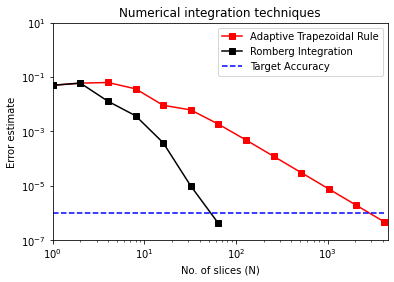

In [173]:
# Plot both datasets
fig, ax = plt.subplots()

# Plot the no. of slices and errors of both integration techniques including the target error for reference
ax.plot(adapt_trap_df['No. of slices'], adapt_trap_df['Error'], 'r', label='Adaptive Trapezoidal Rule', marker='s')        # x-axis: N, y-axis: error
ax.plot(rom_df['No. of slices'], rom_df['Error'], 'k', label='Romberg Integration', marker='s')
ax.plot(adapt_trap_df['No. of slices'], adapt_trap_df['Target error'], 'b', label='Target Accuracy', linestyle='--')

# Scale the axes to standard logarithmic scales
ax.set_xscale('log')
ax.set_yscale('log')

# Label the axes
ax.set_xlabel('No. of slices (N)')
ax.set_ylabel('Error estimate')

# Set the limits for each axis
plt.xlim(1,4500)
plt.ylim(10e-8,10)
plt.title('Numerical integration techniques')         # set title
plt.legend()                                          # show legend
plt.show()                                            # show plot

**As we can see from the plot above, the Romberg integral estimate reached the target accuracy at a much faster rate with 64 slices, as opposed to the 4096 slices needed by the adaptive trapezoidal integral estimate.**

### PROBLEM 3 (10 pts.)

**Integration using Gaussian quadrature**

Calculate the integral from Problem 1 using the Gaussian quadrature method: $ 2x^4 + 3x^2 + 4x + 5$ from $x=0$ to $x=5$.

1. Define the function $\tt gaussxw$ from Appendix E of the Newman text (and run the cell). *(2 pts.)*

2. Calculate the integral using the $\tt gaussxw$ function in (1) and number of slices $N = 3$. Describe each step in the calculation clearly and concisely. *(8 pts.; 4 pts. for the code & 4 pts. for the discussion text)*

In [162]:
# Define gaussxw function from Appendix E of Newman's text
def gaussxw(N):

    # Initial approximation to roots of the Legendre polynomial
    a = linspace(3,4*N-1,N)/(4*N+2)
    x = cos(pi*a+1/(8*N*N*tan(a)))

    # Find roots using Newton's method
    epsilon = 1e-15
    delta = 1.0
    while delta>epsilon:
        p0 = ones(N,float)
        p1 = copy(x)
        for k in range(1,N):
            p0,p1 = p1,((2*k+1)*x*p1-k*p0)/(k+1)
        dp = (N+1)*(p0-x*p1)/(1-x*x)
        dx = p1/dp
        x -= dx
        delta = max(abs(dx))

    # Calculate the weights
    w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)

    return x,w

# Define gaussxwb function
def gaussxwab(N,a,b):
    x,w = gaussxw(N)
    return 0.5*(b-a)*x+0.5*(b+a),0.5*(b-a)*w
  

In [166]:
# Define the given function as f(x)
def f(x):
  return (2*x**4 + 3*x**2 + 4*x + 5)

a = 0.0                                     # lower bound
b = 5.0                                     # upper bound
N = 3                                       # number of slices
Exact_val = 1450                            # exact value of the integral

# Calculate the sample points and weights
x, w = gaussxw(N)
xp = 0.5*(b-a)*x + 0.5*(b+a)                # map the sample points to specified domain
wp = 0.5*(b-a)*w                            # rescale the weights

# Initialize the experimental value of the integral
I_val = 0.0

# Sum the product of the computed sample points with respective weights
for k in range(N):
  I_val += wp[k]*f(xp[k])                   # Newman formula
error = (I_val - Exact_val)/Exact_val       # calculate the percent error of the experimental value of the integral
print("Using the gaussian quadrature function, the approximate value of the integral is:", I_val, "with percent error:", error)

Using the gaussian quadrature function, the approximate value of the integral is: 1450.000000000002 with percent error: 1.4112848820614403e-15


In [167]:
# Similarly, we can call the gaussxwab function which automatically maps and scales the sample points and weights, respectively
x, w = gaussxwab(N, a, b)                      
integral = 0.0                                 # initialize integral

for k in range(N):
  integral += w[k] * f(x[k])                   # Newman formula
error = (integral - Exact_val)/Exact_val       # calculate the percent error of the experimental value of the integral
print("Using the gaussian quadrature function, the approximate value of the integral is:", integral, "with percent error:", error)

Using the gaussian quadrature function, the approximate value of the integral is: 1450.000000000002 with percent error: 1.4112848820614403e-15


### PROBLEM 4 (30 pts.)

**Physics Application: Anharmonic Oscillator**

_Refer to Exercise 5.10 of the Newman text._ Consider an anharmonic oscillator with potential $V(x)$ symmetric about $x = 0$. Let us set our anharmonic oscillator going with amplitude $a$. That is, at $t = 0$ we release it from rest at position $x = a$ and it swings back towards the origin. Then at $t = 0$ we have $dx/dt = 0$ and the equation for its total energy becomes $E = V(a)$, i.e., the total energy of the particle is given in terms of the amplitude.

When the particle reaches the origin for the first time, it has gone through one quarter of a period of the oscillator. The period $T$ is given by: $$ T = \sqrt{8m} \int_0^a \frac{dx}{\sqrt{V(a)-V(x)}}. $$

1. Suppose the potential is $V(x) = x^4$ and the mass of the particle is $m = 1$. Write a Python function that calculates the period of the oscillator for given amplitude a using Gaussian quadrature with $N = 20$ points. Describe each step clearly and concisely. *(16 pts.; 8 pts. for the code & 8 pts. for the discussion text)*

2. Use your function to make a graph of the period for amplitudes ranging from $a = 0$ to $a = 2$. Describe the behavior you find and explain these results clearly and concisely. *(14 pts.; 7 pts. for the plot & 7 pts. for the discussion text)*

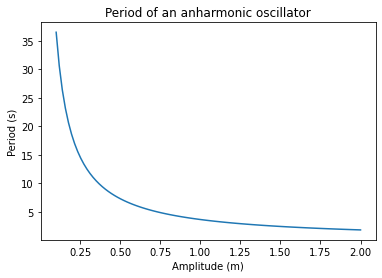

In [103]:
# Assign variables
m = 1
N = 20
a = np.linspace(0.1,2,100)                       # create an array for the amplitude points

# Initialize list                                
Periods = []

# Define functions
def v(x):
  return x**4

def f(x, a):
  return 1 / sqrt(v(a) - v(x))                   

# Calculate the period of the oscillator given an amplitude a
def T(a):
  x, w = gaussxwab(N, 0, a)                      # call gaussxwab function to generate sample points and weights
  integral = 0.0                                 # initialize integral
  for k in range(N):                             # solve for integral by summation loop as before
    integral += w[k] * f(x[k], a)

  return sqrt(8*m)*integral                      # return the overall function of period T

# Append the computed values of T in the Periods list
for i in range(len(a)):
    Periods.append(T(a[i]))

# Plot
plt.title("Period of an anharmonic oscillator")
plt.xlabel("Amplitude (m)")
plt.ylabel("Period (s)")
plt.plot(a,Periods)
plt.show()

**From the plot above, we can see that as the amplitude increases, the period decreases. Since the potential is given by V(x) = x^4, this inverse relationship makes sense. We can also note that the period diverges at amplitude = 0.**

### PROBLEM 5 (20 pts.)

**Differentiation using central difference**

1. Calculate the derivative of the function $1 + \frac{1}{2} \tanh 2x$ in the range $-2 \le x \le 2$ using central difference. Describe each step of the calculation clearly and concisely. *(10 pts.; 5 pts. for the code & 5 pts. for the discussion text)*

2. Calculate an analytic formula for the derivative and make a graph with your numerical result and the analytic answer on the same plot. Plot the exact answer as lines and the numerical one as dots. Describe how the two results compare. *(10 pts.; 5 pts. for the code & 5 pts. for the discussion text)*

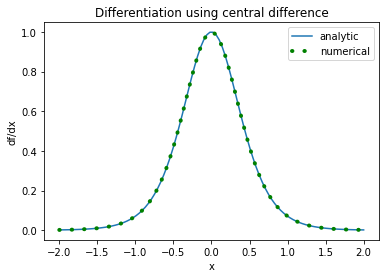

In [168]:
# Define the given function as f(x)
def f(x):
  return 1 + (0.5 * tanh(2*x))

# Assign variables
x_range = np.linspace(-2, 2, 100)                           # create an array for x points
h = 0.01                                                    # assign a small enough value to the width for the approximation

# Initialize list for numerical and analytic derivatives
numerical = []
analytic = []

# Loop over the values of x_range
for x in x_range:
  numerical_der = (f(x + h/2) - f(x - h/2))/h               # numerical derivative using Newman formula for central difference
  analytic_der = (1 / cosh(2*x))**2                         # analytic derivative done by hand
  analytic.append(analytic_der)                             # append values of analytic derivative under list  
  numerical.append(numerical_der)                           # append values of numerical derivative under list

# Plot
plt.plot(x_range, analytic, label = "analytic", linestyle ='solid')        # set appropriate axes values, labels, and graphing styles
plt.plot(x_range, numerical, label = "numerical", linestyle = (0,(0.1,3)), dash_capstyle = 'round', linewidth = 4, color = 'green')
plt.title("Differentiation using central difference")                      # set title
plt.legend()                                                               # show legend
plt.xlabel("x")                                                            # set axis label
plt.ylabel("df/dx")                                                        # set axis label
plt.show()

**As we can see from the plot above, numerical differentiation using central difference is a sufficiently accurate method for the given function. At h = 0.02, the numerical values lie on the same curve as the analytical values.**